In [1]:
import pyxdf
from utils import sync_streams, combine_streams

CSL_Laptop
Start OBS Vid  UNIX timestamp: 1730468864.031
Task Beginning UNIX timestamp: 1730469119.293 (255 sec in)
Task End       UNIX timestamp: 1730472644.717 (3790 sec in)

HCI_Lab1
Start OBS Vid  UNIX timestamp: 1730468872.720
Task Beginning UNIX timestamp: 1730469119.120 (246 sec in)

HCI_Lab2
Start OBS Vid  UNIX timestamp: 1730468906.321
Task Beginning UNIX timestamp: 1728469125.988 (219 sec in)

In [2]:
# Group 5
group_num = 5
WPI_xdf_path = f"../Group {group_num}/HCILab1-Group5.xdf"
CSL_xdf_path = f"../Group {group_num}/CSL_Laptop_0111.xdf"
WPI_data_streams, WPI_header = pyxdf.load_xdf(WPI_xdf_path)
CSL_data_streams, CSL_header = pyxdf.load_xdf(CSL_xdf_path)
video_start_UNIX_times = {
    "OBS_HCILab1": 1730468872.720,
    "OBS_HCILab2": 1730468906.321,
    "OBS_CSL_Laptop": 1730468864.031,
}
task_start_UNIX_times = {
    "OBS_HCILab1": 1730469119.120,
    "OBS_HCILab2": 1730469125.988,
    "OBS_CSL_Laptop": 1730469119.293,
}
task_duration = 1730472644.717 - 1730469119.293
task_duration

Stream 4: Calculated effective sampling rate 17.3545 Hz is different from specified rate 30.0000 Hz.


3525.4240000247955

length of EEG stream: 983723
start_EEG_index: 67070, end_EEG_index: 948426
padded_start_EEG_index: 58070, padded_end_EEG_index: 957426
actual end EEG index: 890356
For EEG Stream Unicorn_HCILab1, start cutoff index is 9000 and end cutoff index is 890356

length of EEG stream: 926038
start_EEG_index: 99635, end_EEG_index: 980991
padded_start_EEG_index: 90635, padded_end_EEG_index: 989991
actual end EEG index: 835403
[cut short] For EEG Stream Unicorn_HCILab2, start cutoff index is 9000 and end cutoff index is 835403

length of EEG stream: 977014
start_EEG_index: 67021, end_EEG_index: 948377
padded_start_EEG_index: 58021, padded_end_EEG_index: 957377
actual end EEG index: 890356
For EEG Stream Unicorn_CSL_Laptop, start cutoff index is 9000 and end cutoff index is 890356



/Users/henryhuang/3rd Year/research/brain-hci/EEG-sync/virtual_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


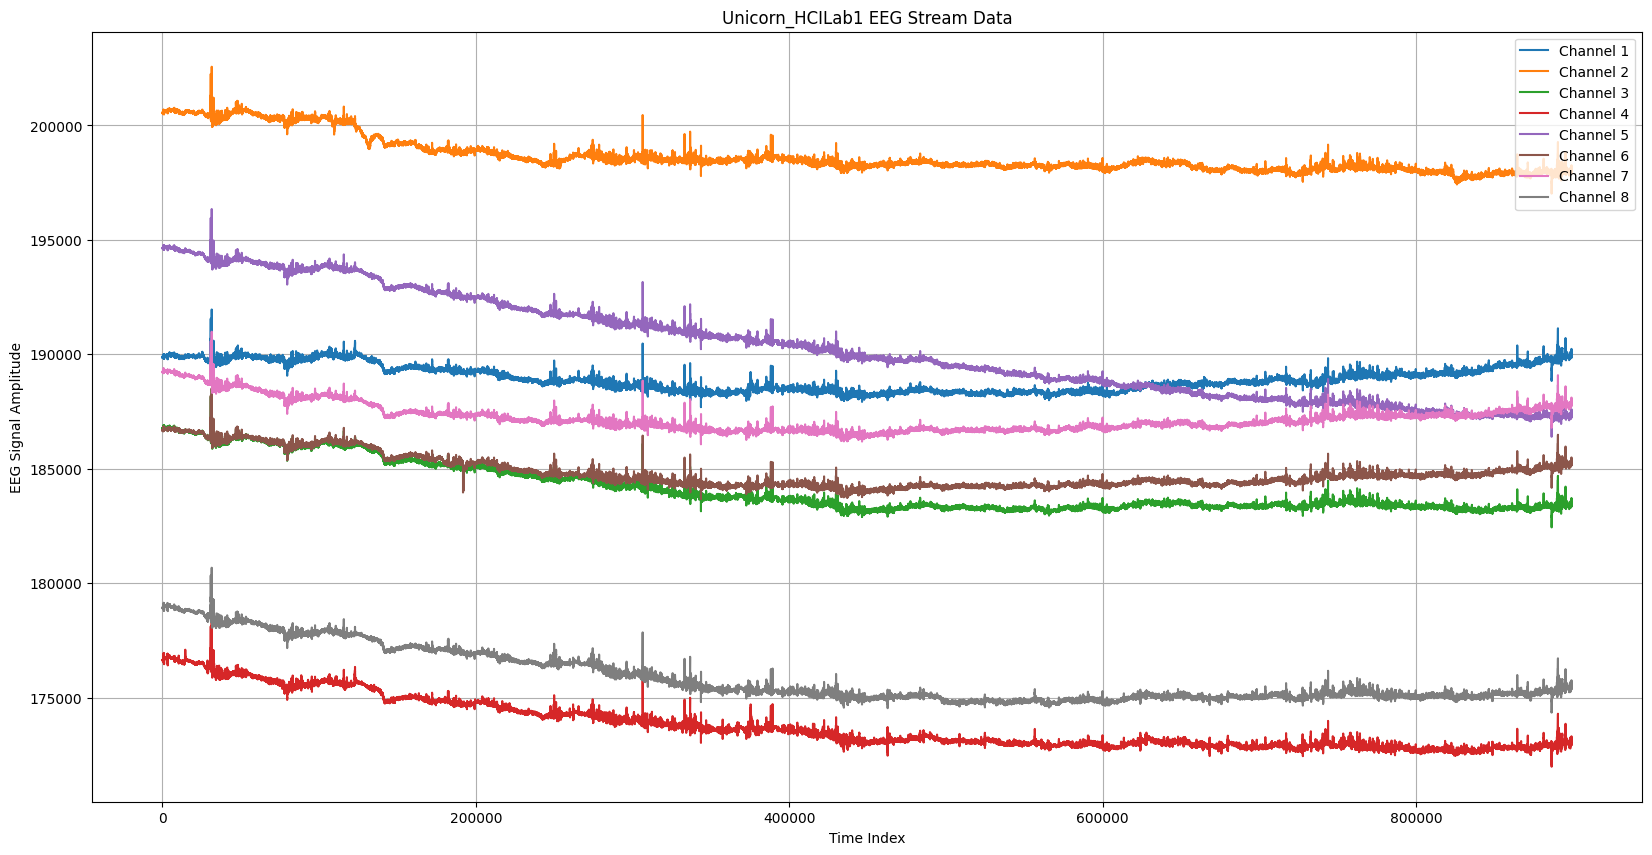

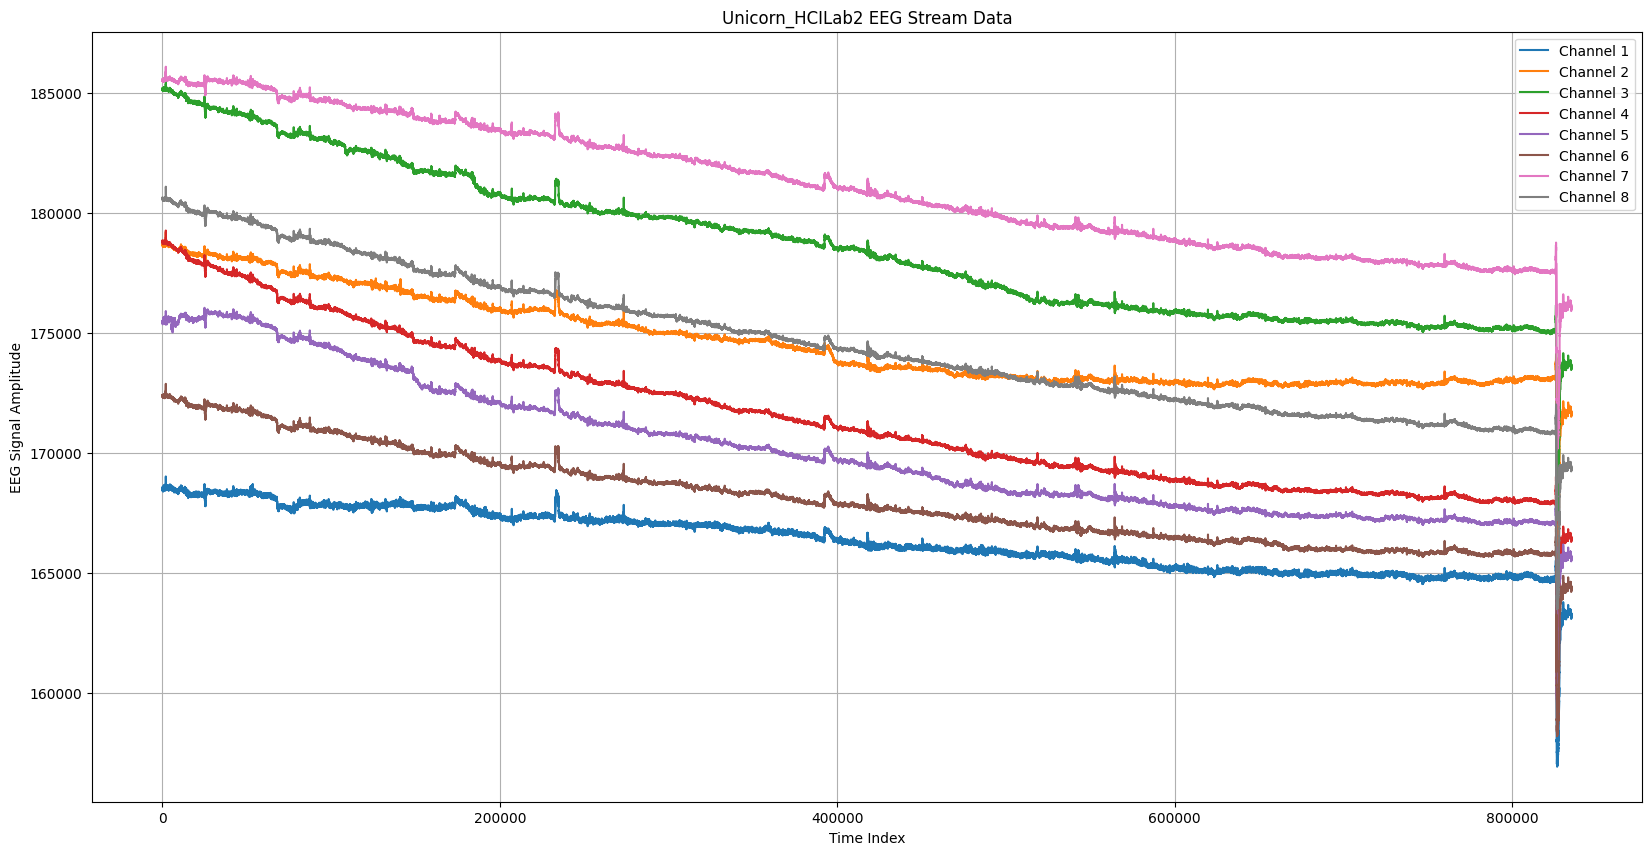

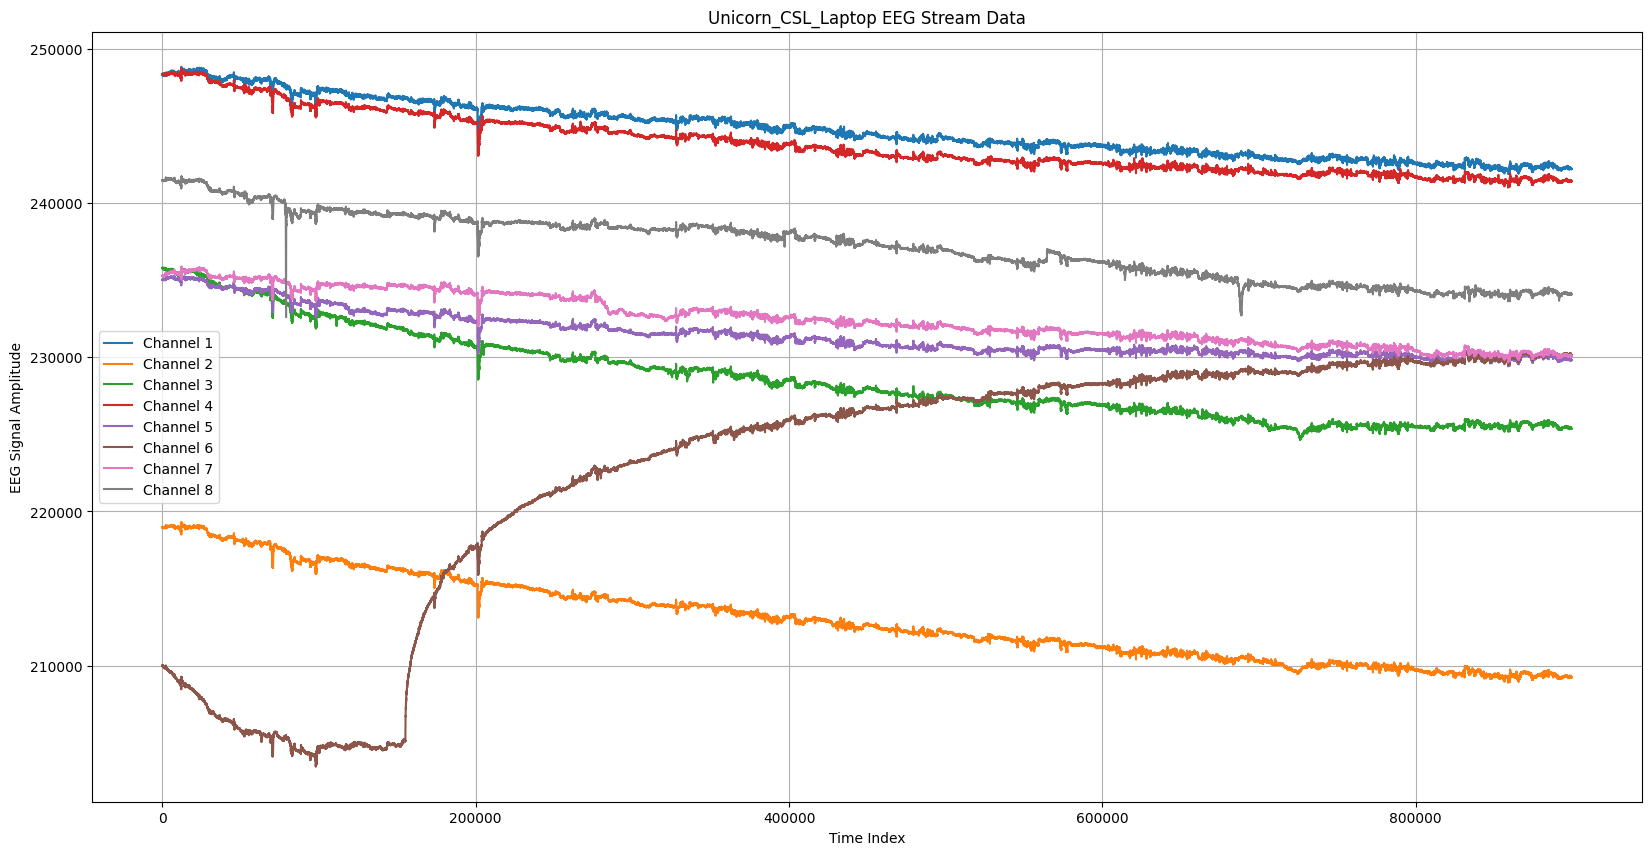

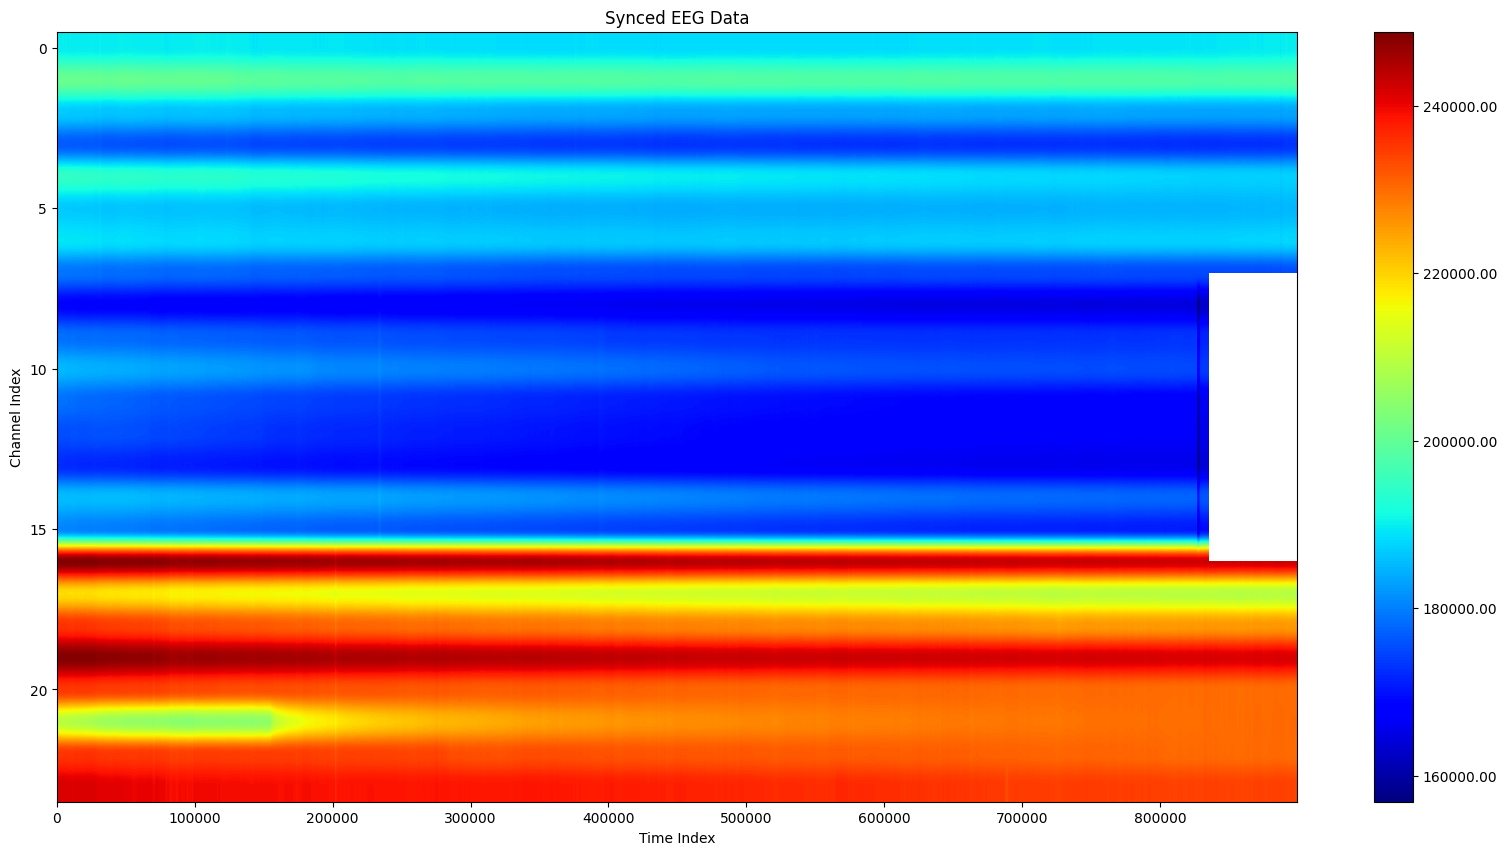

Min: 156920.6875
Max: 248834.453125
Mean: 197331.72317617454
Standard Deviation: 26553.969205211077


In [3]:
# Sync the streams based on the shared stream's timestamp
streams = sync_streams(WPI_data_streams, CSL_data_streams, video_start_UNIX_times, task_start_UNIX_times, task_duration)
combine_streams(group_num, streams)